<a href="https://colab.research.google.com/github/Arthampatel/Credit_Card_Default_Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>Project Details :- </b>

##### **Project Type**    - Credit Card Default Prediction
##### **Contribution**    - Individual
##### **Team Member 1 -** Artham Patoliya


# **Problem Statement :-**



Credit card defaulting is a significant concern for financial institutions as it leads to substantial financial losses and impacts the overall credit risk management. Predicting whether a customer will default on their credit card payments is crucial for banks and financial institutions to mitigate risks and make informed decisions on credit issuance and debt recovery strategies. Using historical data and machine learning techniques, we aim to build a predictive model that accurately forecasts credit card defaults.

# **GitHub Link :-**

## **Obejctive :-**

The primary objective of this project is to develop a supervised classification model that predicts the likelihood of a customer defaulting on their credit card payment in the next billing cycle. The performance of the model will be evaluated using the Area Under the Receiver Operating Characteristic Curve (AUC-ROC), which measures the model's ability to distinguish between default and non-default cases. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments.


#### **Dataset Description :**


**Customer ID** - Unique identifier for each customer

**Credit Limit** - Maximum credit limit for the customer

**Balance** - Outstanding balance on the credit card

**Payment History** - Record of payments made by the customer

**Transactions** - Details of purchases and cash advances

**Delinquencies** - Record of overdue payments and their durations

**Income** - Customer's annual income

**Age** - Age of the customer

**Employment Status** - Employment information of the customer

**Other Relevant Demographic and Financial Variables**

####**Problem Scope:**

**1. Data Preprocessing** - Clean and preprocess the data, handle missing values,
outliers, and perform feature engineering to create meaningful predictors.

**2. Exploratory Data Analysis (EDA)** - Conduct EDA to understand the distribution of variables, relationships, and identify potential predictors.

**3. Feature Selection** - Select relevant features that contribute to predicting credit card defaults.

**4. Model Development** - Develop and compare various supervised classification models (e.g., Logistic Regression, Decision Trees, Random Forest, Gradient Boosting, Neural Networks) to predict credit card defaults.

**5. Model Evaluation** - Evaluate the models using the AUC-ROC metric to determine the best-performing model. Additional evaluation metrics such as Precision, Recall, F1-Score, and Confusion Matrix can be used for a comprehensive analysis.

**6. Hyperparameter Tuning** - Optimize the model's hyperparameters to improve performance.

**7. Model Deployment** - Prepare the final model for deployment, ensuring it can handle real-time data for credit default predictions.

# **Let's Begin :-**

####**Know Your Data**

In [1]:
#importing required libraries for data analysis
import pandas as pd
import numpy as np
from numpy import math

#importing libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-ac9e6b8fd91d>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pip install xlrd

In [4]:
df = pd.read_excel('/content/drive/MyDrive/DS601 Assignment /Copy of default of credit card clients.xls',header =1 )

In [5]:
#take a first of dataset
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# **Data Cleaning**

In [6]:
#shape of data
df.shape

(30000, 25)

In [7]:
#basic information of datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
#summary of dataset
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [9]:
#check for na values in dataset
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [10]:
#check for null values in dataset
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [11]:
#check for any duplicates
print("The Number of duplicates :",len(df[df.duplicated()]))

The Number of duplicates : 0


- Dataset dose not contains any NA values, null values and duplicates.

# <b> Data Description </b>



In [12]:
#columns of dataset
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
#shape of dataset
df.shape

(30000, 25)


### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following variables as explanatory variables:
* **ID**: Unique ID of each client
* **LIMIT_BAL**: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* **Gender**: 1 = male; 2 = female
* **Education**: 1 = graduate school; 2 = university; 3 = high school; 4 = others
* **Marital status**: 1 = married; 2 = single; 3 = others).
* **Age**: Age in years

 ## **History of past payment.**

### We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* **PAY_0**: Repayment status in September, 2005

* **PAY_2**: Repayment status in August, 2005

* **PAY_3**: Repayment status in July, 2005

* **PAY_4**: Repayment status in June, 2005

* **PAY_5**: Repayment status in May, 2005

* **PAY_6**: Repayment status in April, 2005


## **Amount of bill statement (NT dollar).**

* **BILL_AMT1**: Amount of bill statement in September, 2005

* **BILL_AMT2**: Amount of bill statement in August, 2005

* **BILL_AMT3:** Amount of bill statement in July, 2005
* **BILL_AMT4**: Amount of bill statement in June, 2005

* **BILL_AMT5**: Amount of bill statement in May, 2005

* **BILL_AMT6**: Amount of bill statement in April, 2005

## **Amount of previous payment (NT dollar).**

* **PAY_AMT1**: Amount of previous payment in September, 2005

* **PAY_AMT2**: Amount of previous payment in August, 2005

* **PAY_AMT3**: Amount of previous payment in July, 2005
* **PAY_AMT4**: Amount of previous payment in June, 2005
* **PAY_AMT5**: Amount of previous payment in May, 2005

* **PAY_AMT6**: Amount of previous payment in April, 2005

* **default.payment.next.month**: Default payment (1=yes, 0=no)

# **Data Preprocessing**

**Changing name of some columns for simplicity and better understanding**

In [14]:
#renaming of columns
df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [15]:
#check for columns name
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [16]:
#replacing values with there labels
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [17]:
#check for replaced labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


# **Exploratory Data Analysis**

## **IsDefaulter**

<Axes: xlabel='IsDefaulter', ylabel='count'>

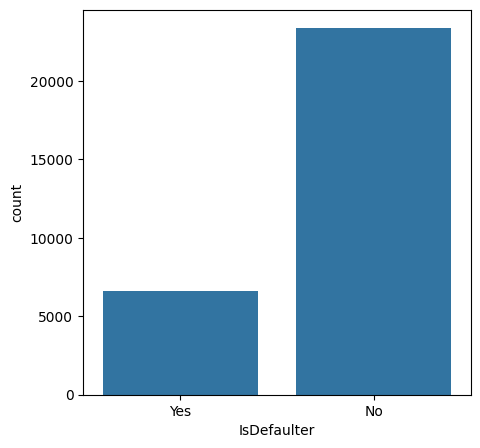

In [18]:
#values count plot of IsDefaulter
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df)

- Both classes are not in proportion that is we have imbalanced dataset.

<Axes: xlabel='SEX', ylabel='count'>

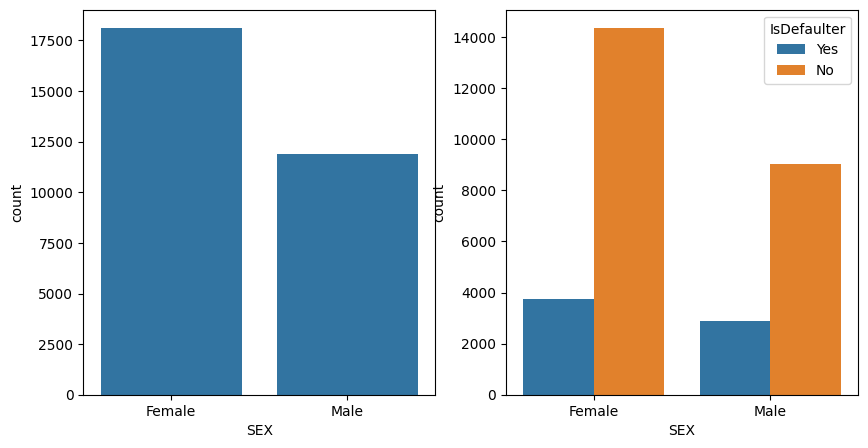

In [19]:
#count plot for Sex and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)

## **EDUCATION**

In [20]:
#category wise values
df['EDUCATION'].value_counts()

EDUCATION
University         14030
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: count, dtype: int64

- In education column, values such as 5,6 and 0 are unknown. Lets combine those values as others.

In [21]:
#replcae values with 5, 6 and 0 to Others
df.EDUCATION = df.EDUCATION.replace({5: "Others", 6: "Others",0: "Others"})

<Axes: xlabel='EDUCATION', ylabel='count'>

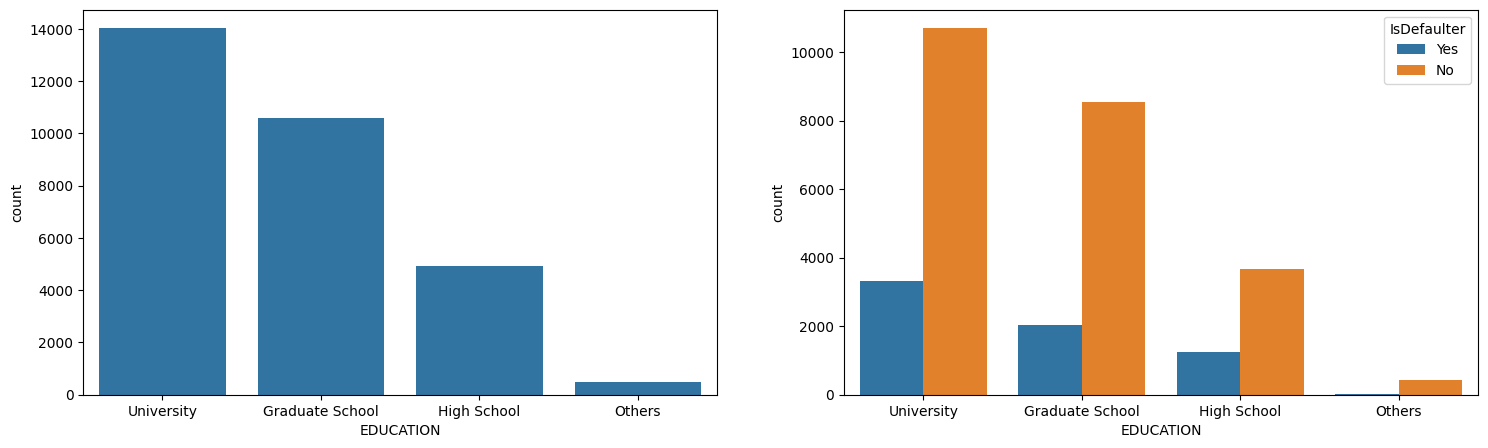

In [22]:
#count plot for EDUCATION and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(18,5))
sns.countplot(x = 'EDUCATION', ax = axes[0], data = df)
sns.countplot(x = 'EDUCATION', hue = 'IsDefaulter',ax = axes[1], data = df)

## **MARRIAGE**

In [23]:
#category wise values
df['MARRIAGE'].value_counts()

MARRIAGE
Single     15964
Married    13659
Others       323
0             54
Name: count, dtype: int64

- In marriage column, 0 values are not known. Combine those values in others category.

In [24]:
#replace 0 with Others
df.MARRIAGE = df.MARRIAGE.replace({0: "Others"})

<Axes: xlabel='MARRIAGE', ylabel='count'>

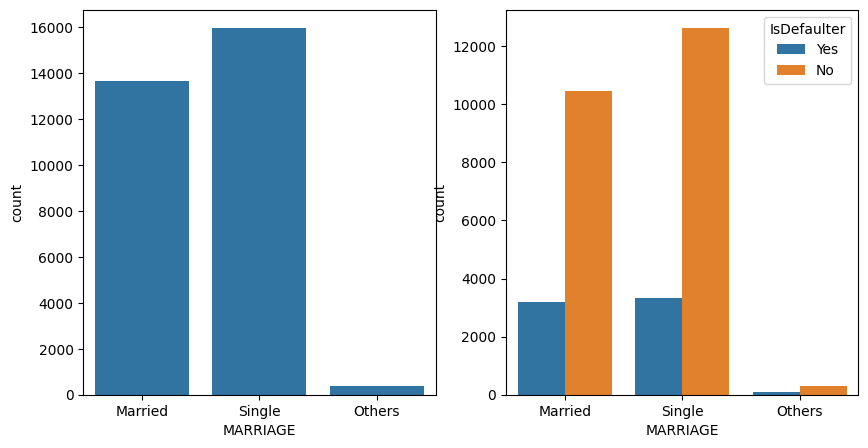

In [25]:
#count plot for MARRIAGE and with respect to IsDefaulter
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)

## **AGE**

In [26]:
#age wise values of credit card holder
df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

<Axes: xlabel='AGE', ylabel='count'>

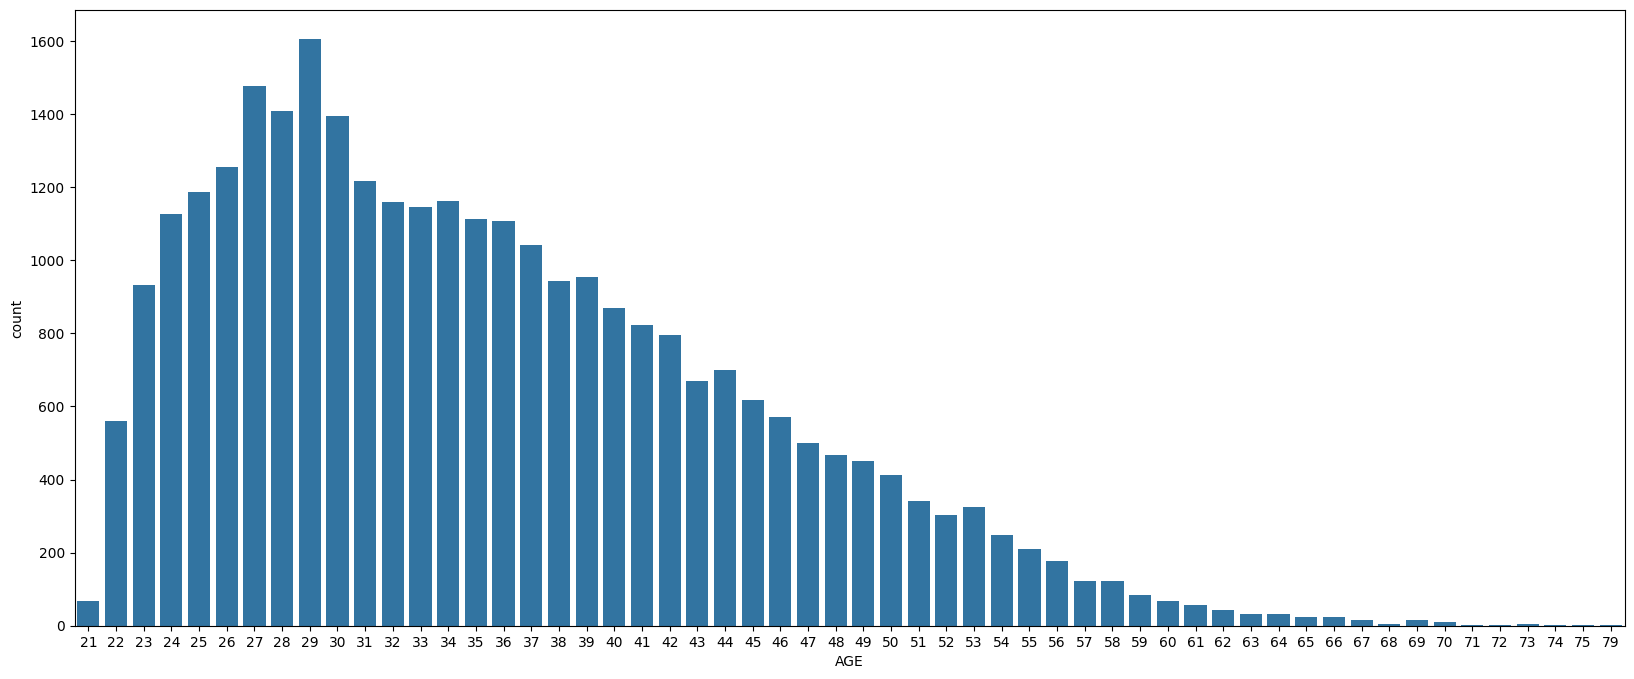

In [27]:
#values count for AGE
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', data = df)

<Axes: xlabel='AGE', ylabel='count'>

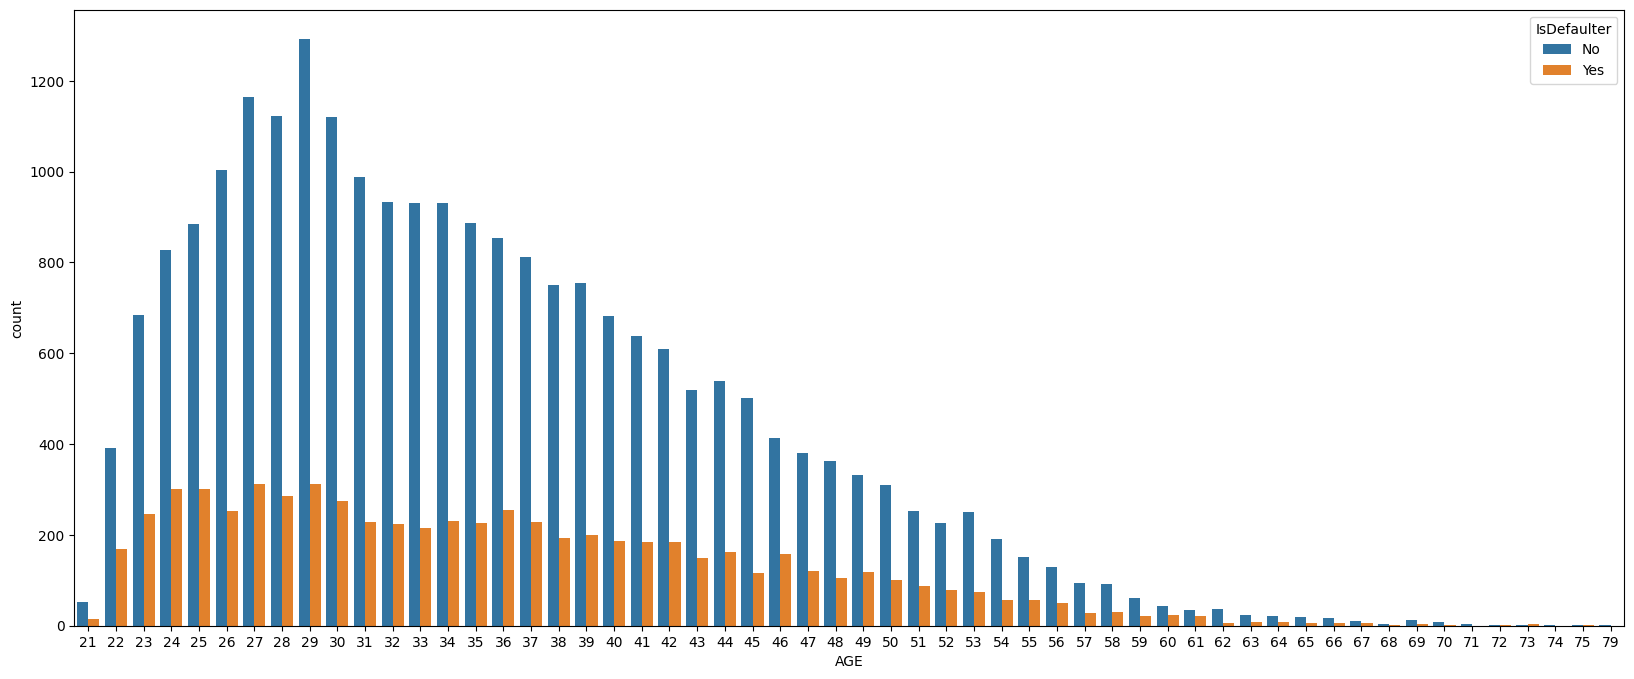

In [28]:
#values count for Age with respect to IsDefaulter
plt.figure(figsize=(20,8))
sns.countplot(x = 'AGE', hue = 'IsDefaulter', data = df)

## **Label Encoding**

In [29]:
#label encoding
encoders_nums = {"SEX":{"Female":0,"Male":1}, "IsDefaulter":{"Yes":1, "No":0}}

df = df.replace(encoders_nums)

In [30]:
#check for changed labels
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,0,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,0,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,0,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,0,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## **One Hot Encoding**

In [31]:
#creating dummy variables
df = pd.get_dummies(df, columns = ['EDUCATION', 'MARRIAGE'])

In [32]:
df.shape

(30000, 30)

In [33]:
df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)

In [34]:
df.shape

(30000, 28)

In [35]:
#creating dummy variables by droping firs variable
df = pd.get_dummies(df, columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [36]:
df.shape

(30000, 80)

In [37]:
#check for all the created variables
df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,False,False,False,True,False,False,False,False,False,False
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,False,False,True,False,False,False,False,False,False,False
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,False,False,True,False,False,False,False,False,False,False
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,False,False,True,False,False,False,False,False,False,False


In [38]:
#shape of dataset after creating dummy variables
df.shape

(30000, 80)

# **Handling Class Imbalance**

## **SMOTE** - Synthetic Minority Oversampling Technique

In [39]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [40]:
#creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))

In [41]:
#adding target variable to new created dataframe
balanced_df['IsDefaulter'] = y_smote

<Axes: xlabel='IsDefaulter', ylabel='count'>

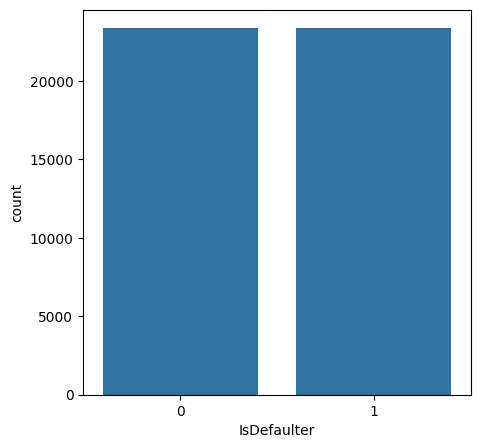

In [42]:
#check for class imbalance
plt.figure(figsize=(5,5))
sns.countplot( x=balanced_df['IsDefaulter'],data=balanced_df)

In [43]:
#shape of balanced dataframe
balanced_df.shape

(46728, 80)

In [44]:
#removing feature ID from dataset
balanced_df.drop('ID',axis = 1, inplace = True)

In [45]:
#final dataset
balanced_df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
0,20000,0,24,3913,3102,689,0,0,0,0,...,False,False,False,False,False,False,False,False,False,1
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,False,False,True,False,False,False,False,False,False,1
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,False,True,False,False,False,False,False,False,False,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,False,True,False,False,False,False,False,False,False,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,False,True,False,False,False,False,False,False,False,0


In [46]:
#to display upto 200 columns and rows at once
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [47]:
#correlation among all the features
balanced_df.corr()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
LIMIT_BAL,1.000000,-0.000876,0.156178,0.308001,0.299151,0.302896,0.309794,0.311848,0.305077,0.193251,0.184563,0.207266,0.207880,0.214858,0.221904,0.288637,-0.098701,-0.118266,0.138505,-0.051812,0.149936,-0.029141,-0.014304,-0.111236,-0.062027,-0.025038,-1.519141e-02,-0.006492,-0.000957,-0.008986,0.174559,-0.063046,0.006804,-0.169343,-0.049798,-0.033902,-0.012965,-0.001745,-0.009765,-0.004192,0.178212,-0.066724,0.011430,-0.159344,-0.053634,-0.025949,-0.003032,-0.012892,-0.020941,-0.007261,0.160666,-0.066485,1.145490e-02,-0.150814,-0.045320,-0.023836,-0.013622,-0.008718,-0.042202,-5.928659e-03,0.148969,-0.065785,-0.135023,-0.047621,-0.028570,-0.009366,-0.003798,-0.042180,-0.004559,0.151549,-0.058229,-0.137311,-0.042962,-0.027465,-0.006959,-0.011612,-0.036813,-0.004631,-1.891522e-01
SEX,-0.000876,1.000000,0.080419,0.032228,0.029598,0.023113,0.019372,0.014158,0.012579,0.022670,0.013460,0.022834,0.014726,0.015315,0.015800,0.067115,0.044574,0.026525,0.018606,0.085043,0.015675,0.102828,0.030880,-0.000547,0.039339,0.022137,1.859241e-02,0.007275,0.006880,0.010012,0.011189,0.097246,0.009230,0.024524,0.028404,0.025568,0.011688,0.006526,0.011230,-0.003200,0.012980,0.084483,0.013376,0.030818,0.028918,0.016717,0.005272,0.009710,0.005521,0.011584,0.008995,0.080400,9.457898e-03,0.017982,0.036625,0.015878,0.011424,0.001688,0.014333,9.457898e-03,0.009813,0.074049,0.013003,0.029420,0.019838,0.005992,0.013376,0.015474,0.006688,0.008008,0.065066,0.011598,0.030018,0.010413,0.009169,0.012223,0.010598,0.009458,-1.329683e-01
AGE,0.156178,0.080419,1.000000,0.050262,0.047857,0.047774,0.045067,0.042643,0.041179,0.026974,0.021663,0.024135,0.018384,0.019597,0.022602,-0.071001,0.202358,-0.076391,0.408396,-0.414843,0.030952,-0.040305,0.004156,-0.006903,-0.008852,-0.001433,1.720986e-03,0.003366,0.005981,0.001681,0.040202,-0.054424,-0.001215,-0.010643,-0.013020,0.002256,0.000010,0.000548,0.004004,-0.006021,0.040594,-0.049581,-0.000459,-0.015802,-0.001835,-0.007770,0.000216,0.000221,0.000641,0.002034,0.040733,-0.060220,1.164543e-03,-0.005411,0.000477,-0.006941,0.001893,-0.010639,0.005067,7.922285e-04,0.033145,-0.052279,-0.015525,0.005054,-0.003029,-0.002224,-0.006251,0.005361,0.006089,0.041031,-0.042120,-0.016484,-0.009068,-0.006577,0.000548,-0.003971,0.013534,0.002281,2.140998e-03
BILL_AMT_SEPT,0.308001,0.032228,0.050262,1.000000,0.963612,0.913106,0.882846,0.853293,0.829943,0.164146,0.116852,0.177003,0.179724,0.191415,0.203147,-0.020301,-0.017901,0.029044,0.033241,-0.016308,-0.224870,0.291431,-0.111024,0.071798,-0.024852,0.009467,9.917473e-03,0.007817,0.019810,0.016609,-0.243369,0.323601,0.005383,0.005809,-0.002337,0.002698,0.009047,0.023640,0.015944,-0.001523,-0.229998,0.346640,0.008002,-0.012826,-0.011040,0.005214,0.015564,0.012596,-0.017083,-0.003898,-0.207376,0.344067,1.334390e-02,-0.008862,-0.006247,0.001210,0.005976,-0.002977,-0.029327,-2.197017e-03,-0.198102,0.328374,0.007899,-0.012806,-0.000821,-0.005375,0.003545,-0.030000,-0.003003,-0.193746,0.333844,0.008170,-0.015128,-0.011668,-0.001564,-0.003294,-0.027640,-0.001122,-2.534109e-02
BILL_AMT_AUG,0.299151,0.029598,0.047857,0.963612,1.00000

In [48]:
#seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [49]:
X.shape

(46728, 78)

In [50]:
y.shape

(46728,)

## Data Transformation

In [51]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# **Train Test Splitting**

In [52]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [53]:
X_train.shape

(37382, 78)

In [54]:
X_test.shape

(9346, 78)

# **Baseline Model Implementation**

## **Logistic Regression Model**

In [55]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [56]:
#fitting data into Logistic Regression
logi = LogisticRegression()
logi.fit(X_train,y_train)

LogisticRegression()

In [57]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [58]:
#getting all scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.827
The accuracy on test data is  0.83
The precision on test data is  0.792
The recall on test data is  0.857
The f1 on test data is  0.823
The roc_score on test data is  0.832


[[4054  619]
 [ 971 3702]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

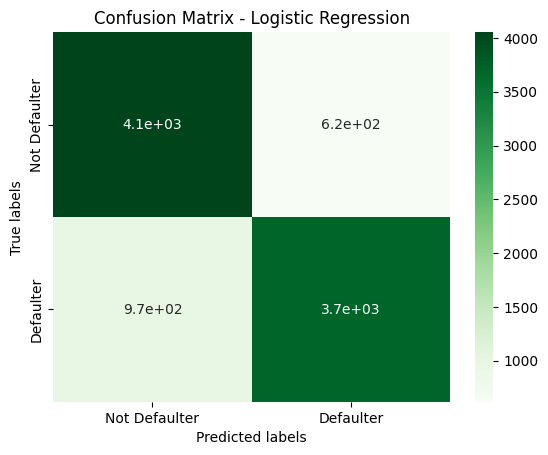

In [59]:
# Get the confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax, cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Decision Tree Classification**

In [60]:
#importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [61]:
#fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
#class prediction of y
y_pred_dtc = dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [63]:
#getting all scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 3)
accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 3)
precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 3)
recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 3)
f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 3)
roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", accuracy_dtc)
print("The precision on test data is ", precision_score_dtc)
print("The recall on test data is ", recall_score_dtc)
print("The f1 on test data is ", f1_score_dtc)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  1.0
The accuracy on test data is  0.802
The precision on test data is  0.816
The recall on test data is  0.793
The f1 on test data is  0.805
The roc_score on test data is  0.802


[[3680  993]
 [ 860 3813]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

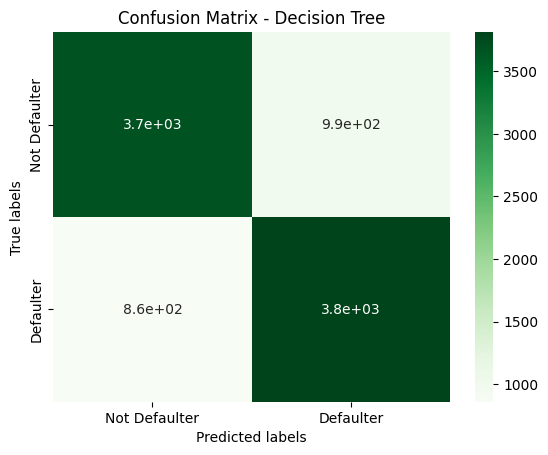

In [64]:
# Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_test, y_pred_dtc )
print(cm_dtc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, ax = ax, cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Random Forest Classification**

In [65]:
#importing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [66]:
#fitting data into Random Forest Classifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [67]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [68]:
#getting all scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 3)
accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 3)
precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 3)
recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 3)
f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 3)
roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", accuracy_rfc)
print("The precision on test data is ", precision_score_rfc)
print("The recall on test data is ", recall_score_rfc)
print("The f1 on test data is ", f1_score_rfc)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  1.0
The accuracy on test data is  0.868
The precision on test data is  0.831
The recall on test data is  0.898
The f1 on test data is  0.863
The roc_score on test data is  0.871


[[4233  440]
 [ 789 3884]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

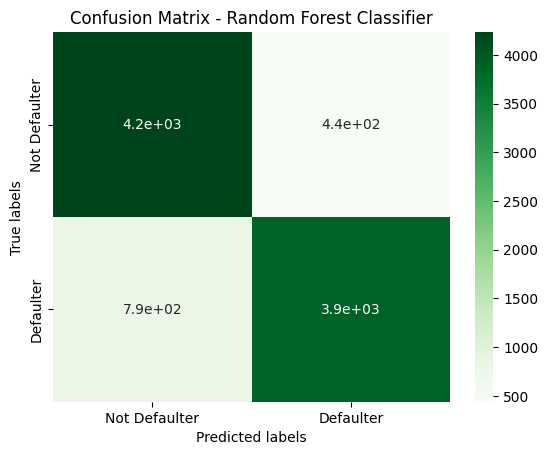

In [69]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax, cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Support Vector Machine**

In [70]:
#importing Support Vector Classifier
from sklearn.svm import SVC

In [71]:
#fitting data into Support Vector Classifier
svm=SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [72]:
#class prediction of y
y_pred_svm=svm.predict(X_test)
y_train_pred_svm=svm.predict(X_train)

In [73]:
#getting all scores for Support Vector Classifier
train_accuracy_svm = round(accuracy_score(y_train_pred_svm,y_train), 3)
accuracy_svm = round(accuracy_score(y_pred_svm,y_test), 3)
precision_score_svm = round(precision_score(y_pred_svm,y_test), 3)
recall_score_svm = round(recall_score(y_pred_svm,y_test), 3)
f1_score_svm = round(f1_score(y_pred_svm,y_test), 3)
roc_score_svm = round(roc_auc_score(y_pred_svm,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", accuracy_svm)
print("The precision on test data is ", precision_score_svm)
print("The recall on test data is ", recall_score_svm)
print("The f1 on test data is ", f1_score_svm)
print("The roc_score on test data is ", roc_score_svm)

The accuracy on train data is  0.847
The accuracy on test data is  0.836
The precision on test data is  0.758
The recall on test data is  0.899
The f1 on test data is  0.822
The roc_score on test data is  0.845


[[4276  397]
 [1133 3540]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

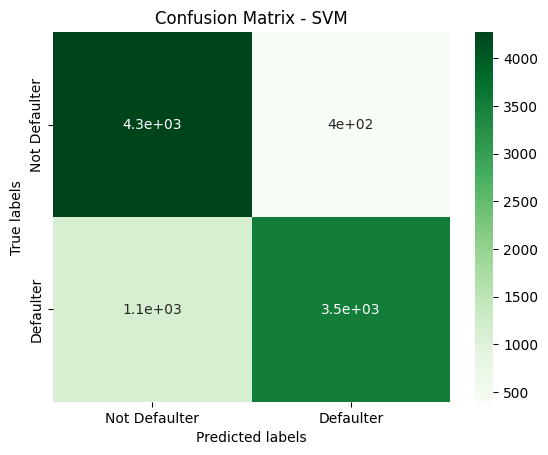

In [74]:
# Get the confusion matrix for Support Vector Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_svm = confusion_matrix(y_test, y_pred_svm )
print(cm_svm)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax, cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Gradient Boosting**

In [75]:
#importing Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
#fitting data into Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [77]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [78]:
#getting all scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 3)
accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 3)
precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 3)
recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 3)
f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 3)
roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc)
print("The accuracy on test data is ", accuracy_gbc)
print("The precision on test data is ", precision_score_gbc)
print("The recall on test data is ", recall_score_gbc)
print("The f1 on test data is ", f1_score_gbc)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.847
The accuracy on test data is  0.843
The precision on test data is  0.797
The recall on test data is  0.877
The f1 on test data is  0.835
The roc_score on test data is  0.846


[[4152  521]
 [ 950 3723]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

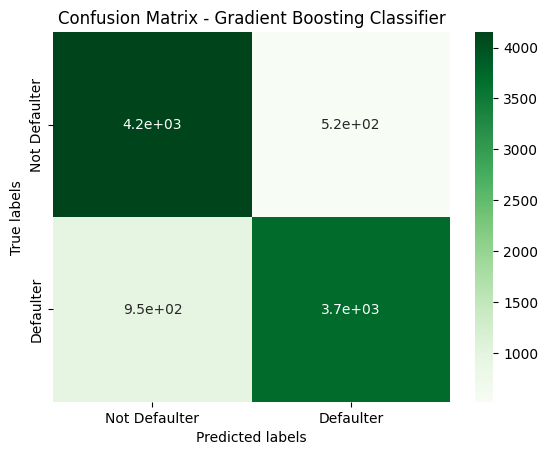

In [79]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax, cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **XG Boosting**

In [80]:
#importing XG Boosting Classifier
from xgboost import XGBClassifier

In [81]:
#fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [83]:
#getting all scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 3)
accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 3)
precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 3)
recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 3)
f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 3)
roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", accuracy_xgb)
print("The precision on test data is ", precision_score_xgb)
print("The recall on test data is ", recall_score_xgb)
print("The f1 on test data is ", f1_score_xgb)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.913
The accuracy on test data is  0.857
The precision on test data is  0.81
The recall on test data is  0.894
The f1 on test data is  0.85
The roc_score on test data is  0.86


[[4226  447]
 [ 888 3785]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

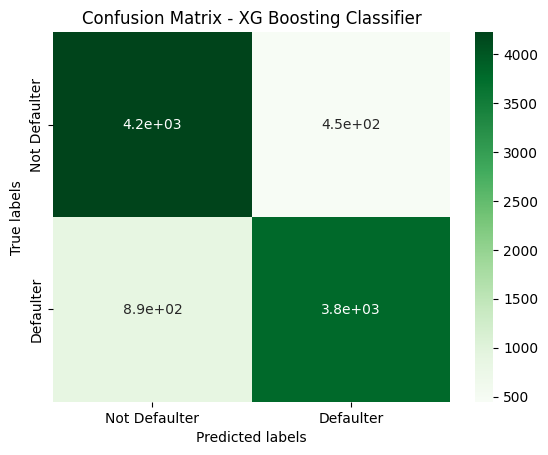

In [84]:
# Get the confusion matrix for XG Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax, cmap='Greens')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

# **Baseline Model Comparision**

In [85]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_svm, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_svm, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_svm, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc, recall_score_svm, recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_svm, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc, roc_score_svm, roc_score_gbc, roc_score_xgb]

In [86]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})

In [87]:
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.827,0.830,0.792,0.857,0.823,0.832
1,Decision Tree,1.000,0.802,0.816,0.793,0.805,0.802
2,Random Forest,1.000,0.868,0.831,0.898,0.863,0.871
3,SVM,0.847,0.836,0.758,0.899,0.822,0.845
4,Gradient Boosting,0.847,0.843,0.797,0.877,0.835,0.846
5,XG Boosting,0.913,0.857,0.810,0.894,0.850,0.860


In [88]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
2,Random Forest,1.000,0.868,0.831,0.898,0.863,0.871
5,XG Boosting,0.913,0.857,0.810,0.894,0.850,0.860
4,Gradient Boosting,0.847,0.843,0.797,0.877,0.835,0.846
3,SVM,0.847,0.836,0.758,0.899,0.822,0.845
0,Logistic Regression,0.827,0.830,0.792,0.857,0.823,0.832
1,Decision Tree,1.000,0.802,0.816,0.793,0.805,0.802


- Random forest classifier shows highest test accuracy and F1 score.

## Combined ROC curve for all the models

In [89]:
#importing roc curve
from sklearn.metrics import roc_curve

In [90]:
#probabilty prediction of y for all model
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_proba_svm = svm.predict_proba(X_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]


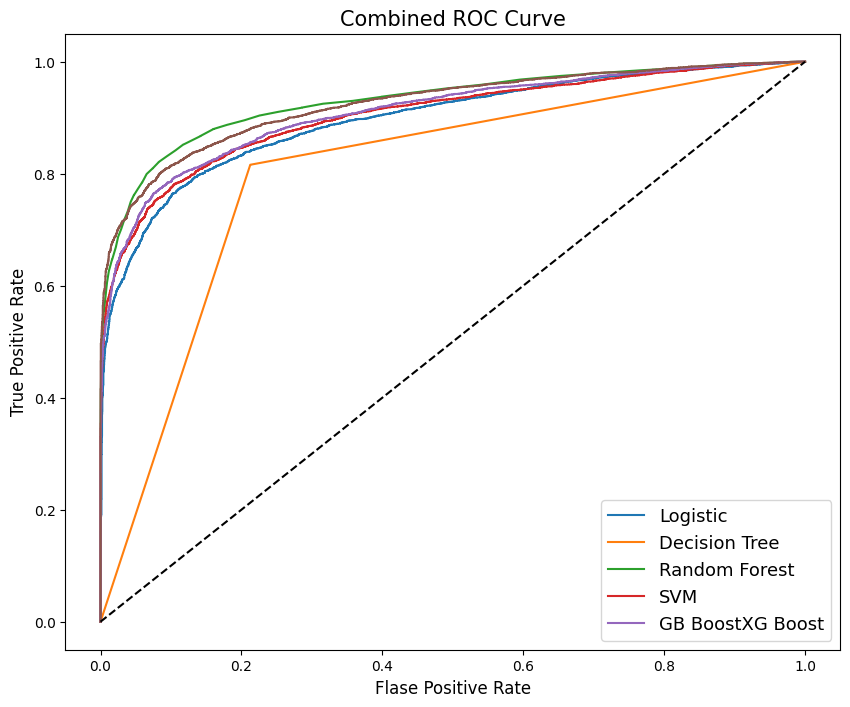

In [91]:
fig = plt.figure(figsize=(10,8))

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_logi)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_svm, tpr_svm, _svm = roc_curve(y_test,  y_pred_proba_svm)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_svm, tpr_svm)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title('Combined ROC Curve', fontsize=15)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "SVM", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

# **Feature Importance On Random Forest Model**

In [92]:
features = list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter')

In [93]:
feature_importances_rfc = rfc.feature_importances_

In [94]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

In [96]:
feature_importances_rfc_df.sort_values(ascending=False)[0:15]

PAY_SEPT_0       0.076832
LIMIT_BAL        0.050578
BILL_AMT_SEPT    0.046444
BILL_AMT_JUN     0.043694
BILL_AMT_JUL     0.042952
BILL_AMT_AUG     0.042895
AGE              0.041831
PAY_AMT_SEPT     0.041353
PAY_AMT_AUG      0.040092
BILL_AMT_APR     0.039408
BILL_AMT_MAY     0.038072
PAY_AMT_JUL      0.037675
PAY_AMT_APR      0.035232
PAY_AMT_JUN      0.034450
PAY_AMT_MAY      0.033089
dtype: float64

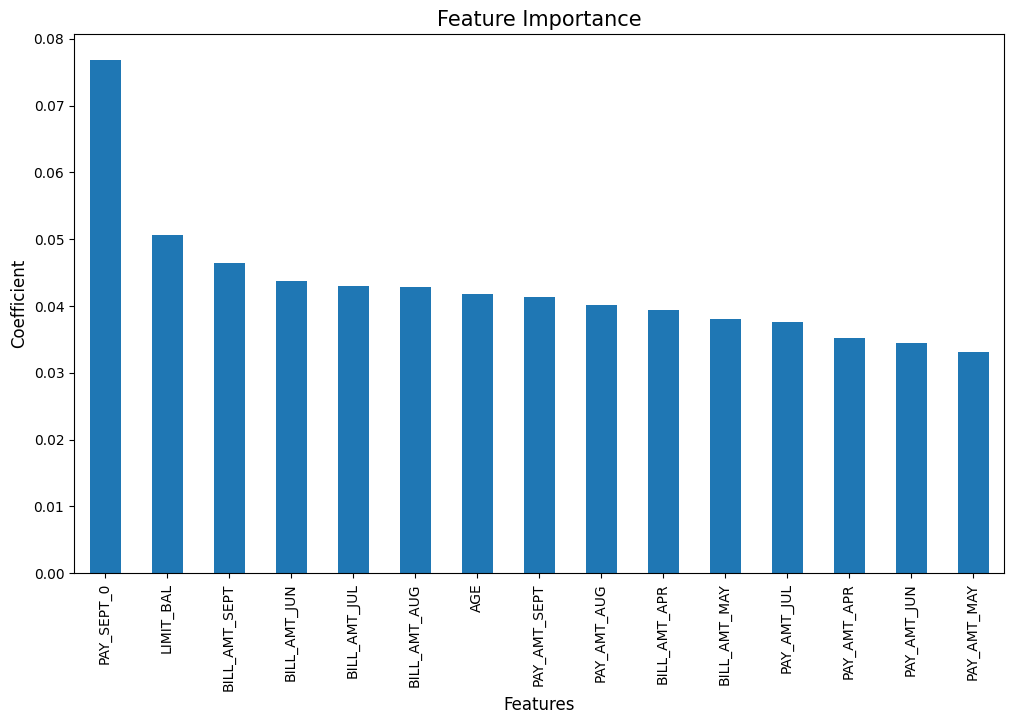

In [97]:
fig = plt.figure(figsize=(12,7))
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

- Above 15 features are the most important features of random forest classifier.

# **Cross Validation & Hyperparameter Tuning**

In [98]:
from sklearn.model_selection import GridSearchCV

## **Logistic Regression Model**

In [99]:
# penalty in Logistic Regression Classifier
penalties = ['l1','l2', 'elasticnet', 'none']

# hyperparameter C
C= [ 0.001, 0.1, 0.5, 1, 1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,
              'max_iter' : [100, 1000,2500],
              'C' : C }

In [100]:
# Create an instance of the Logistic Regression
logi = LogisticRegression()

# Grid search
logi_grid = GridSearchCV(estimator=logi,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
logi_grid.fit(X_train,y_train)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.1, 0.5, 1, 1.5, 5, 10],
                         'max_iter': [100, 1000, 2500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc', verbose=3)

In [101]:
logi_grid.best_estimator_

LogisticRegression(C=0.1)

In [102]:
logi_grid.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

In [103]:
logi_optimal_model = logi_grid.best_estimator_

In [104]:
#class prediction of y on train and test
y_pred_logi_grid = logi_optimal_model.predict(X_test)
y_train_pred_logi_grid = logi_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_test)[:,1]

In [105]:
#getting all scores for Logistic Regression after CV and Hyperparameter Tunning
train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 3)
accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 3)
precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 3)
recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 3)
f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 3)
auc_logi_grid = round(roc_auc_score(y_pred_logi_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi_grid)
print("The accuracy on test data is ", accuracy_logi_grid)
print("The precision on test data is ", precision_score_logi_grid)
print("The recall on test data is ", recall_score_logi_grid)
print("The f1 on test data is ", f1_score_logi_grid)
print("The auc on test data is ", auc_logi_grid)

The accuracy on train data is  0.827
The accuracy on test data is  0.829
The precision on test data is  0.792
The recall on test data is  0.856
The f1 on test data is  0.823
The auc on test data is  0.831


In [106]:
# Get the confusion matrices for train and test
train_cm_logi_grid = confusion_matrix(y_train,y_train_pred_logi_grid)
test_cm_logi_grid = confusion_matrix(y_test,y_pred_logi_grid )

In [107]:
train_cm_logi_grid

array([[16204,  2487],
       [ 3978, 14713]])

In [108]:
test_cm_logi_grid

array([[4050,  623],
       [ 973, 3700]])

## **Decision Tree Classification**

In [109]:
# The maximum depth of the tree
depth_of_tree = [20,25,30]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [110]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [111]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=25, min_samples_leaf=40,
                       min_samples_split=0.001)

In [112]:
dtc_grid.best_params_

{'max_depth': 25, 'min_samples_leaf': 40, 'min_samples_split': 0.001}

In [113]:
dtc_optimal_model = dtc_grid.best_estimator_

In [114]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_test)[:,1]

In [115]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 3)
accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 3)
precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 3)
recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 3)
f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 3)
auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_dtc_grid)
print("The accuracy on test data is ", accuracy_dtc_grid)
print("The precision on test data is ", precision_score_dtc_grid)
print("The recall on test data is ", recall_score_dtc_grid)
print("The f1 on test data is ", f1_score_dtc_grid)
print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.845
The accuracy on test data is  0.822
The precision on test data is  0.783
The recall on test data is  0.85
The f1 on test data is  0.815
The auc on test data is  0.824


In [116]:
# Get the confusion matrices for train and test
train_cm_dtc_grid = confusion_matrix(y_train,y_train_pred_dtc_grid)
test_cm_dtc_grid = confusion_matrix(y_test,y_pred_dtc_grid )

In [117]:
train_cm_dtc_grid

array([[16519,  2172],
       [ 3610, 15081]])

In [118]:
test_cm_dtc_grid

array([[4027,  646],
       [1016, 3657]])

## **Support Vector Machine**

In [124]:
from sklearn.model_selection import RandomizedSearchCV

In [120]:
# Hyperparameter Grid
param_dict = {'C':[1, 10] ,
              'kernel': ['rbf']}

In [122]:
# Create an instance of the support vector classifier
svm=SVC(probability=True)

# Grid search
svm_grid = RandomizedSearchCV(estimator = svm, param_distributions = param_dict,
                       cv = 2, verbose=2, n_jobs = -1, scoring= 'roc_auc')
# fitting model
svm_grid.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [1, 10], 'kernel': ['rbf']},
                   scoring='roc_auc', verbose=2)

In [123]:
svm_grid.best_estimator_

SVC(C=1, probability=True)

In [125]:
svm_grid.best_params_

{'kernel': 'rbf', 'C': 1}

In [126]:
svm_optimal_model = svm_grid.best_estimator_

In [127]:
#class prediction of y on train and test
y_pred_svm_grid=svm_optimal_model.predict(X_test)
y_train_pred_svm_grid=svm_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_test)[:,1]

In [128]:
#getting all scores for Support Vector Classifier after CV and Hyperparameter Tunning
train_accuracy_svm_grid = round(accuracy_score(y_train_pred_svm_grid,y_train), 3)
accuracy_svm_grid = round(accuracy_score(y_pred_svm_grid,y_test), 3)
precision_score_svm_grid = round(precision_score(y_pred_svm_grid,y_test), 3)
recall_score_svm_grid = round(recall_score(y_pred_svm_grid,y_test), 3)
f1_score_svm_grid = round(f1_score(y_pred_svm_grid,y_test), 3)
auc_svm_grid = round(roc_auc_score(y_pred_svm_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_svm_grid)
print("The accuracy on test data is ", accuracy_svm_grid)
print("The precision on test data is ", precision_score_svm_grid)
print("The recall on test data is ", recall_score_svm_grid)
print("The f1 on test data is ", f1_score_svm_grid)
print("The auc on test data is ", auc_svm_grid)

The accuracy on train data is  0.847
The accuracy on test data is  0.836
The precision on test data is  0.758
The recall on test data is  0.899
The f1 on test data is  0.822
The auc on test data is  0.845


In [129]:
# Get the confusion matrices for train and test
train_cm_svm_grid = confusion_matrix(y_train,y_train_pred_svm_grid)
test_cm_svm_grid = confusion_matrix(y_test,y_pred_svm_grid )

In [130]:
train_cm_svm_grid

array([[17350,  1341],
       [ 4387, 14304]])

In [131]:
test_cm_svm_grid

array([[4276,  397],
       [1133, 3540]])

## **Random Forest Classifer**

In [132]:
# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [133]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

# Grid search
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.3s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   3.7s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.1s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.8s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   3.8s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   6.2s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   6.3s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   5.6s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   6.8s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [134]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=30, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=150)

In [135]:
rfc_grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 150}

In [136]:
rfc_optimal_model = rfc_grid.best_estimator_

In [137]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_test)[:,1]

In [138]:
#getting all scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 3)
accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 3)
precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 3)
recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 3)
f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 3)
auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_rfc_grid)
print("The accuracy on test data is ", accuracy_rfc_grid)
print("The precision on test data is ", precision_score_rfc_grid)
print("The recall on test data is ", recall_score_rfc_grid)
print("The f1 on test data is ", f1_score_rfc_grid)
print("The auc on test data is ", auc_rfc_grid)

The accuracy on train data is  0.843
The accuracy on test data is  0.829
The precision on test data is  0.787
The recall on test data is  0.859
The f1 on test data is  0.821
The auc on test data is  0.831


In [139]:
# Get the confusion matrices for train and test
train_cm_rfc_grid = confusion_matrix(y_train,y_train_pred_rfc_grid)
test_cm_rfc_grid = confusion_matrix(y_test,y_pred_rfc_grid )

In [140]:
train_cm_rfc_grid

array([[16530,  2161],
       [ 3720, 14971]])

In [141]:
test_cm_rfc_grid

array([[4070,  603],
       [ 997, 3676]])

## **Gradient Boosting**

In [142]:
# to shrinks the contribution of each tree by learning_rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [143]:
# Create an instance of the RandomForestClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2, scoring='roc_auc')
# fitting model
gbc_grid.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=1, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time= 1.1min
[CV] END learning_rate=1, max_depth=10, min_samples_leaf=50, min_samples_split=100, n_estimators=200; total time= 1.1min
[CV] END learning_rate=0.5, max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=  30.8s
[CV] END learning_rate=0.5, max_depth=10, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=  31.6s
[CV] END learning_rate=0.25, max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time= 1.7min
[CV] END learning_rate=0.25, max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=200; total time= 1.6min
[CV] END learning_rate=0.25, max_depth=20, min_samples_leaf=50, min_samples_split=150, n_estimators=150; total time= 1.2min
[CV] END learning_rate=0.25, max_depth=20, min_samples_leaf=50, min_samples_spl

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]},
                   scoring='roc_auc', verbose=2)

In [144]:
gbc_grid.best_estimator_

GradientBoostingClassifier(max_depth=30, min_samples_leaf=40,
                           min_samples_split=50, n_estimators=200,
                           random_state=42)

In [145]:
gbc_grid.best_params_

{'n_estimators': 200,
 'min_samples_split': 50,
 'min_samples_leaf': 40,
 'max_depth': 30,
 'learning_rate': 0.1}

In [146]:
gbc_optimal_model = gbc_grid.best_estimator_

In [147]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(X_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_test)[:,1]

In [148]:
#getting all scores for Gradient Boosting after CV and Hyperparameter Tunning
train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 3)
accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 3)
precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test), 3)
recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 3)
f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 3)
auc_gbc_grid = round(roc_auc_score(y_pred_gbc_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_gbc_grid)
print("The accuracy on test data is ", accuracy_gbc_grid)
print("The precision on test data is ", precision_score_gbc_grid)
print("The recall on test data is ", recall_score_gbc_grid)
print("The f1 on test data is ", f1_score_gbc_grid)
print("The auc on test data is ", auc_gbc_grid)

The accuracy on train data is  0.999
The accuracy on test data is  0.871
The precision on test data is  0.837
The recall on test data is  0.897
The f1 on test data is  0.866
The auc on test data is  0.872


In [149]:
# Get the confusion matrices for train and test
train_cm_gbc_grid = confusion_matrix(y_train,y_train_pred_gbc_grid)
test_cm_gbc_grid = confusion_matrix(y_test,y_pred_gbc_grid )

In [150]:
train_cm_gbc_grid

array([[18672,    19],
       [   36, 18655]])

In [151]:
test_cm_gbc_grid

array([[4225,  448],
       [ 762, 3911]])

## **XG Boosting**

In [152]:
from sklearn.model_selection import RandomizedSearchCV

In [153]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [154]:
# Create an instance of the RandomForestClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250]},
                   scoring='roc_auc', verbose=2)

In [155]:
xgb_grid.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=1, min_samples_leaf=40, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [156]:
xgb_grid.best_params_

{'n_estimators': 200,
 'min_samples_leaf': 40,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.05,
 'gamma': 0.1}

In [157]:
xgb_optimal_model = xgb_grid.best_estimator_

In [158]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_test)[:,1]

In [159]:
#getting all scores for XG Boosting after CV and Hyperparameter Tunning
train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 3)
accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 3)
precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test), 3)
recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 3)
f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 3)
auc_xgb_grid = round(roc_auc_score(y_pred_xgb_grid,y_test), 3)

print("The accuracy on train data is ", train_accuracy_xgb_grid)
print("The accuracy on test data is ", accuracy_xgb_grid)
print("The precision on test data is ", precision_score_xgb_grid)
print("The recall on test data is ", recall_score_xgb_grid)
print("The f1 on test data is ", f1_score_xgb_grid)
print("The auc on test data is ", auc_xgb_grid)

The accuracy on train data is  0.996
The accuracy on test data is  0.871
The precision on test data is  0.834
The recall on test data is  0.901
The f1 on test data is  0.866
The auc on test data is  0.873


In [160]:
# Get the confusion matrices for train and test
train_cm_xgb_grid = confusion_matrix(y_train,y_train_pred_xgb_grid)
test_cm_xgb_grid = confusion_matrix(y_test,y_pred_xgb_grid )

# **Final Model Comparision**

In [161]:
grid_classifiers = ['Optimal Logistic Regression', 'Optimal Decision Tree', 'Optimal Random Forest', 'Optimal SVM', 'Optimal Gradient Boosting', 'Optimal XG Boosting']
grid_train_accuracy = [train_accuracy_logi_grid, train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_svm_grid, train_accuracy_gbc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [accuracy_logi_grid, accuracy_dtc_grid, accuracy_rfc_grid, accuracy_svm_grid, accuracy_gbc_grid, accuracy_xgb_grid]
grid_precision_score = [precision_score_logi_grid, precision_score_dtc_grid, precision_score_rfc_grid, precision_score_svm_grid, precision_score_gbc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_logi_grid, recall_score_dtc_grid, recall_score_rfc_grid, recall_score_svm_grid, recall_score_gbc_grid, recall_score_xgb_grid]
grid_f1_score = [f1_score_logi_grid, f1_score_dtc_grid, f1_score_rfc_grid, f1_score_svm_grid, f1_score_gbc_grid, f1_score_xgb_grid]
grid_auc_score = [auc_logi_grid, auc_dtc_grid, auc_rfc_grid, auc_svm_grid, auc_gbc_grid, auc_xgb_grid]

In [162]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score , 'AUC': grid_auc_score})

In [163]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()

In [164]:
all_comparision_df.drop('index', axis=1, inplace=True)

In [165]:
all_comparision_df.sort_values('AUC', axis=0, ascending=False, inplace=True)

In [166]:
all_comparision_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
11,Optimal XG Boosting,0.996,0.871,0.834,0.901,0.866,0.873
10,Optimal Gradient Boosting,0.999,0.871,0.837,0.897,0.866,0.872
2,Random Forest,1.000,0.868,0.831,0.898,0.863,0.871
5,XG Boosting,0.913,0.857,0.810,0.894,0.850,0.860
4,Gradient Boosting,0.847,0.843,0.797,0.877,0.835,0.846
3,SVM,0.847,0.836,0.758,0.899,0.822,0.845
9,Optimal SVM,0.847,0.836,0.758,0.899,0.822,0.845
0,Logistic Regression,0.827,0.830,0.792,0.857,0.823,0.832
6,Optimal Logistic Regression,0.827,0.829,0.792,0.856,0.823,0.831
8,Optimal Random Forest,0.843,0.829,0.787,0.859,0.821,0.831


# **Conclusion**

- From all baseline model, Random forest classifier shows highest test accuracy and F1 score and AUC.

- Baseline model of Random forest and decision tree shows huge difference in train and test accuracy which shows overfitting.

* After cross validation and hyperparameter tunning, XG Boost shows highest test accuracy score of 87.10% and AUC is 0.874.

* Cross validation and hyperparameter tunning certainly reduces chances of overfitting and also increases performance of model.